In [227]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [228]:
# create synthetic data

N = 2000 #The number of samples
x = torch.randn(N,1) #torch function for random number generator
y = x + torch.randn(N,1) # torch.randn(N,1) is an added noise

train_ratio = 0.8
indices = torch.randperm(N)  # shuffle indices
train_size = int(train_ratio * N)
train_idx = indices[:train_size]
test_idx = indices[train_size:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# and plot
#plt.plot(x,y,'o')
#plt.show()

In [229]:
# build model
ANN_model = nn.Sequential(
    nn.Linear(1,1),  # input layer: (1,1) first 1 is the number of features going in, second 1 is the number of output of hidden layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer: (1,1) first 1 is the output going out of hidden layer, second 1 is the result after the output layer
    )

ANN_model #model summary

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [230]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimization
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=learningRate)

In [231]:
# train the model
numepochs = 500

losses = torch.zeros(numepochs) # instantiate the losses to zero


## for loop to run on each epoch
for epochi in range(numepochs):

  # forward pass
  yHat = ANN_model(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

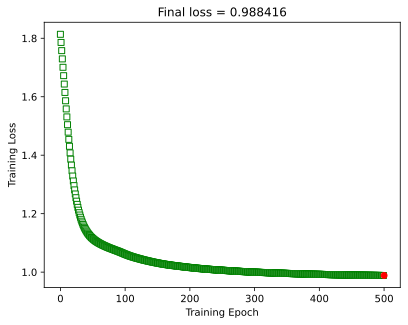

In [232]:
# create predictions for every values of x
predictions = ANN_model(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() #Mean Squared Error

plt.plot(losses.detach(),'gs',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Training Epoch')
plt.ylabel('Training Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [233]:
testloss.item()

0.9884162545204163

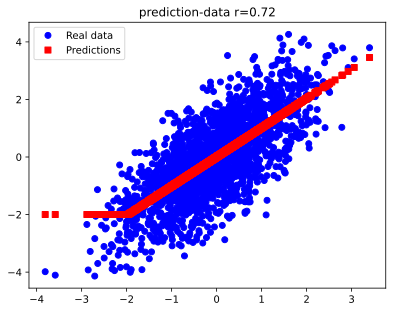

In [234]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Experiments

1. Vary the value of N and rerun the codes, contrast and compare the result.

2. Vary the value of the noise torch.randn(N,1), try multiplying it with a constant, try dividing it with a constant,c. How does the result differ? How does the noise affect the performance of the model?

3. Try experimenting with the learning rate, how does learning rate affect the model?
4. Use N>999, split the data into training and testing, train a model and determine its performance on the test data.